In [5]:
import random
import pandas as pd

# create random dataset
data = {
    "Age": [random.randint(18, 60) for _ in range(10)],
    "Salary": [random.randint(20000, 80000) for _ in range(10)],
    "Score": [round(random.uniform(0, 100), 2) for _ in range(10)]
}

df = pd.DataFrame(data)
print(df)



   Age  Salary  Score
0   41   71594  42.96
1   44   31744   6.58
2   29   26363  27.26
3   38   69851  82.21
4   31   52354  54.52
5   22   71989  74.52
6   28   22963  98.54
7   53   67791  39.96
8   32   62636  20.30
9   54   56225  45.06


In [6]:
from faker import Faker
import pandas as pd

fake = Faker()
data = [{"Name": fake.name(),
         "Email": fake.email(),
         "City": fake.city(),
         "DOB": fake.date_of_birth(minimum_age=18, maximum_age=60)}
        for _ in range(10)]

df = pd.DataFrame(data)
df


,Name,Email,City,DOB
0,Marcus Sharp,louis38@example.org,Rayburgh,1983-05-05
1,Mrs. Cynthia Woods,markdeleon@example.com,West Bruce,1966-07-09
2,Robert Boyd,lindahenderson@example.com,South Bobby,1984-05-20
3,James Zimmerman,ngonzales@example.net,Port Jeffery,1978-08-13
4,Rebecca Burke,ycooper@example.org,Hoffmanchester,1972-03-15
5,James Johnson,ogarcia@example.org,Tuckerchester,2006-09-09
6,Katherine Scott,douglasrice@example.com,Ballstad,1965-09-28
7,Karen Wiggins,lydia14@example.net,East Keithburgh,1965-06-19
8,Mark Nelson,bakerolivia@example.net,Klinestad,2002-03-23
9,Tiffany Hernandez,howardrachel@example.com,Wattsport,2000-04-20


### Write a program to find the missing values duplicate values and noise outliers in a user created dataset in code should be in ten lines

In [7]:
import pandas as pd, numpy as np

# create dataset
df = pd.DataFrame({"A":[1,2,2,np.nan,100,3,4],
                   "B":[5,6,np.nan,8,9,9,10]})

print("Missing:\n", df.isnull().sum())        # missing values
print("\nDuplicates:\n", df.duplicated().sum()) # duplicate rows
q1,q3 = df["A"].quantile([0.25,0.75])          # IQR for outliers
iqr = q3-q1
outliers = df[(df["A"] < q1-1.5*iqr) | (df["A"] > q3+1.5*iqr)]
print("\nOutliers:\n", outliers)


Missing:
 A    1
B    1
dtype: int64

Duplicates:
 0

Outliers:
        A    B
4  100.0  9.0


### Write a program to demonstrate standardization techniques in Python.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# dataset
df = pd.DataFrame({"Marks":[50,70,80,90,100],
                   "Age":[18,19,20,21,22]})

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

print("Original Data:\n", df)
print("\nStandardized Data:\n", pd.DataFrame(scaled, columns=df.columns))


Original Data:
    Marks  Age
0     50   18
1     70   19
2     80   20
3     90   21
4    100   22

Standardized Data:
       Marks       Age
0 -1.627467 -1.414214
1 -0.464991 -0.707107
2  0.116248  0.000000
3  0.697486  0.707107
4  1.278724  1.414214


### Write a program to demonstrate encoding techniques in Python.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# dataset
df = pd.DataFrame({"Name":["Tom","Nick","John","Tom"],
                   "City":["Delhi","Mumbai","Delhi","Chennai"]})

# Label Encoding
le = LabelEncoder()
df["City_Label"] = le.fit_transform(df["City"])

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["City"])
print(df)
print("\nOne-Hot Encoded:\n", df_encoded)


   Name     City  City_Label
0   Tom    Delhi           1
1  Nick   Mumbai           2
2  John    Delhi           1
3   Tom  Chennai           0

One-Hot Encoded:
    Name  City_Label  City_Chennai  City_Delhi  City_Mumbai
0   Tom           1         False        True        False
1  Nick           2         False       False         True
2  John           1         False        True        False
3   Tom           0          True       False        False


### Write a program to find linear regression MSC SSe R square to the data points given in the table X values are 1,2,3,4 5.Y values are 1 2 3 3.75 2.25

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1,2,3,3.75,2.25])

model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

MSE = mean_squared_error(y, y_pred)
SSE = np.sum((y - y_pred)**2)
R2  = r2_score(y, y_pred)

print("MSE:", MSE, "\nSSE:", SSE, "\nR²:", R2)


MSE: 0.5037499999999999 
SSE: 2.5187499999999994 
R²: 0.4176300578034684


### Write a program to find the linear regression MSE, SSE, R2 to the data points from the GitHub dataset. 

In [ ]:
import pandas as pd, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load dataset from GitHub (example: salary data)
url = "https://raw.githubusercontent.com/selva86/datasets/master/Salary_Data.csv"
df = pd.read_csv(url)

X, y = df[["YearsExperience"]], df["Salary"]
model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

MSE = mean_squared_error(y, y_pred)
SSE = np.sum((y - y_pred)**2)
R2  = r2_score(y, y_pred)

print("MSE:", MSE, "\nSSE:", SSE, "\nR²:", R2)


### write a program to find the linear regression msc sse r square to the data points from the user created data set 

In [16]:
import pandas as pd, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# user-created dataset
df = pd.DataFrame({"X":[1,2,3,4,5,6],
                   "Y":[2,4,5,4,5,7]})

X, y = df[["X"]], df["Y"]
model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

MSE = mean_squared_error(y,y_pred)
SSE = np.sum((y-y_pred)**2)
R2  = r2_score(y,y_pred)

print("MSE:",MSE,"\nSSE:",SSE,"\nR²:",R2)


MSE: 0.5142857142857143 
SSE: 3.0857142857142863 
R²: 0.7714285714285714


4. Write a program to implement linear regression using gradient descent and visualize the relationship between mean squared error and bias with weight. 

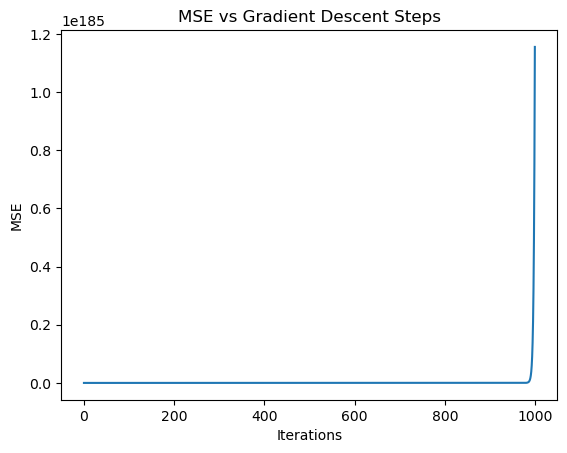

Final Weight: -1.1777719871821254e+92 Bias: -3.262239548149007e+91 MSE: 1.1555083827910735e+185


In [17]:
import numpy as np, matplotlib.pyplot as plt

# dataset
X = np.array([1,2,3,4,5])
y = np.array([1,2,3,3.75,2.25])

# gradient descent
w,b,lr,epochs = 0,0,0.01,1000
errors=[]
for _ in range(epochs):
    y_pred = w*X+b
    error = y - y_pred
    w += lr * (-2*np.sum(X*error)/len(X))
    b += lr * (-2*np.sum(error)/len(X))
    errors.append(np.mean(error**2))

# plot MSE vs iterations
plt.plot(errors)
plt.xlabel("Iterations"); plt.ylabel("MSE")
plt.title("MSE vs Gradient Descent Steps")
plt.show()

print("Final Weight:",w,"Bias:",b,"MSE:",errors[-1])


5. Write a program to perform exploratory data analysis with Python using correlation covariance matrix Euclidean distance matrix Eigen values and eigenvectors pair plot matrix. 

Correlation:
           X         Y         Z
X  1.000000  0.774597 -0.900000
Y  0.774597  1.000000 -0.645497
Z -0.900000 -0.645497  1.000000

Covariance:
       X     Y     Z
X  2.50  1.50 -2.25
Y  1.50  1.50 -1.25
Z -2.25 -1.25  2.50

Euclidean Distance Matrix:
 [[0.         3.         3.74165739 4.69041576 6.40312424]
 [3.         0.         1.73205081 2.23606798 3.74165739]
 [3.74165739 1.73205081 0.         2.44948974 3.60555128]
 [4.69041576 2.23606798 2.44948974 0.         1.73205081]
 [6.40312424 3.74165739 3.60555128 1.73205081 0.        ]]

Eigenvalues:
 [5.66017895 0.18568359 0.65413746] 
Eigenvectors:
 [[ 0.65015617  0.7594767  -0.02218324]
 [ 0.42388685 -0.33833218  0.84014955]
 [-0.6305687   0.5556316   0.54190094]]


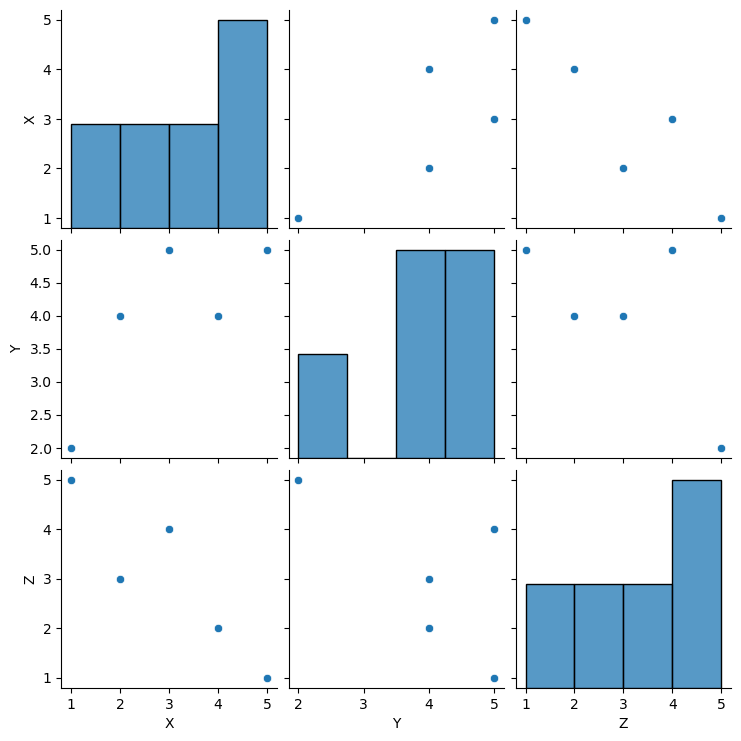

In [18]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

# sample dataset
df = pd.DataFrame({"X":[1,2,3,4,5],
                   "Y":[2,4,5,4,5],
                   "Z":[5,3,4,2,1]})

print("Correlation:\n", df.corr())
print("\nCovariance:\n", df.cov())

# Euclidean distance matrix
dist = np.linalg.norm(df.values[:,None]-df.values, axis=2)
print("\nEuclidean Distance Matrix:\n", dist)

# Eigen decomposition of covariance
eig_vals, eig_vecs = np.linalg.eig(df.cov())
print("\nEigenvalues:\n", eig_vals, "\nEigenvectors:\n", eig_vecs)

# Pair plot
sns.pairplot(df); plt.show()


## Logistic Regression

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# load dataset (binary classification: class 0 vs class 1)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("classification_report: \n ", classification_report(y_test, y_pred))
print("confusion_matrix: \n ", confusion_matrix(y_test, y_pred))




Logistic Regression Accuracy: 0.9777777777777777
classification_report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

confusion_matrix: 
  [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### logistic reg with logodds and sigmoid function

In [1]:
import numpy as np
# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])
# Coefficients (assumed for illustration)
beta_0 = -4   # intercept
beta_1 = 1.2  # slope

# Calculate log-odds
z = beta_0 + beta_1 * x
print("Log-odds (z):", z)
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Apply sigmoid
probabilities = sigmoid(z)
print("Predicted probabilities:", probabilities)
# Convert probabilities to class labels
predictions = [1 if p >= 0.5 else 0 for p in probabilities]
print("Predicted classes:", predictions)


Log-odds (z): [-2.8 -1.6 -0.4  0.8  2. ]
Predicted probabilities: [0.05732418 0.16798161 0.40131234 0.68997448 0.88079708]
Predicted classes: [0, 0, 0, 1, 1]


6. Demonstrate polynomial regression leads to over fitting

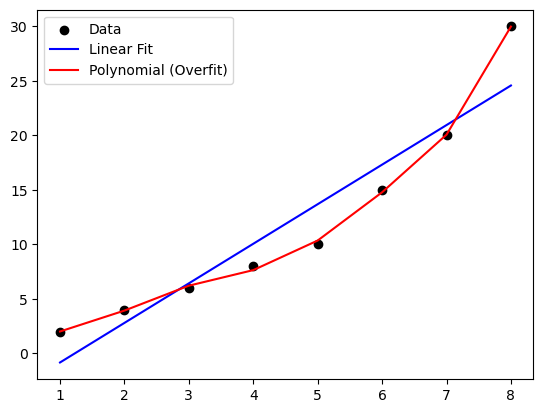

In [19]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# dataset
X = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y = np.array([2,4,6,8,10,15,20,30])  # not perfectly linear

# Linear Regression
lin = LinearRegression().fit(X,y)
y_lin = lin.predict(X)

# Polynomial Regression (degree=6)
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression().fit(X_poly,y)
y_poly = poly_reg.predict(X_poly)

# Plot
plt.scatter(X,y,color='black',label="Data")
plt.plot(X,y_lin,color='blue',label="Linear Fit")
plt.plot(X,y_poly,color='red',label="Polynomial (Overfit)")
plt.legend(); plt.show()


7. Show how polynomial models of increasing degree exhibit bias variance trade-off with training and validation error curves

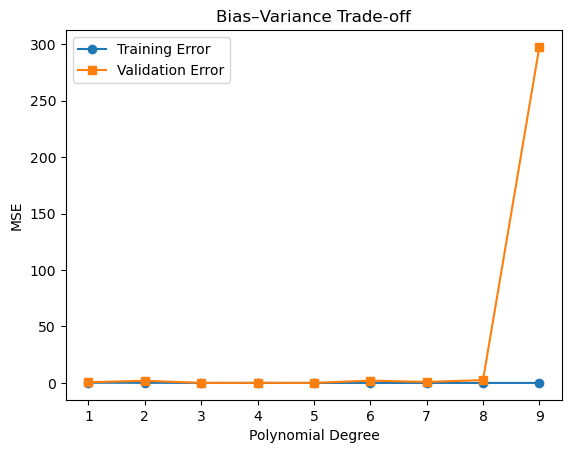

In [20]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# synthetic dataset
X = np.linspace(0,1,20).reshape(-1,1)
y = np.sin(2*np.pi*X).ravel() + np.random.randn(20)*0.1
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=0)

train_err, val_err = [], []
degrees = range(1,10)

for d in degrees:
    poly = PolynomialFeatures(d)
    Xtr, Xv = poly.fit_transform(X_train), poly.transform(X_val)
    model = LinearRegression().fit(Xtr,y_train)
    train_err.append(mean_squared_error(y_train, model.predict(Xtr)))
    val_err.append(mean_squared_error(y_val, model.predict(Xv)))

plt.plot(degrees, train_err, 'o-', label="Training Error")
plt.plot(degrees, val_err, 's-', label="Validation Error")
plt.xlabel("Polynomial Degree"); plt.ylabel("MSE")
plt.title("Bias–Variance Trade-off")
plt.legend(); plt.show()


# 8. Generate mesh grid that fits into generalizable tool

This program defines a generalizable mesh grid function that works with any 2D dataset.

It’s widely used in ML for decision boundary visualization or creating function surfaces.

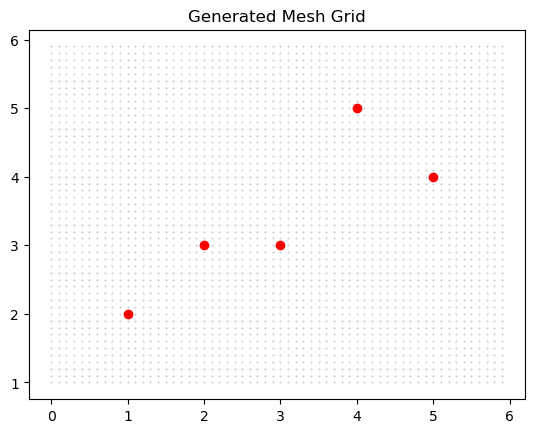

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(X, h=0.1, pad=1):
    """Generate mesh grid for given 2D dataset X"""
    x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
    y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
v
# Example usage
X = np.array([[1,2],[2,3],[3,3],[4,5],[5,4]])  # 2D dataset
xx, yy = make_meshgrid(X)

plt.scatter(X[:,0], X[:,1], color='red')
plt.plot(xx,yy,'k.',markersize=1,alpha=0.2)  # mesh points
plt.title("Generated Mesh Grid")
plt.show()


# 9.Generate swiss roll for a random dataset

A colorful 3D scatter plot shaped like a Swiss Roll (spiral sheet).

Colors indicate progression along the roll.


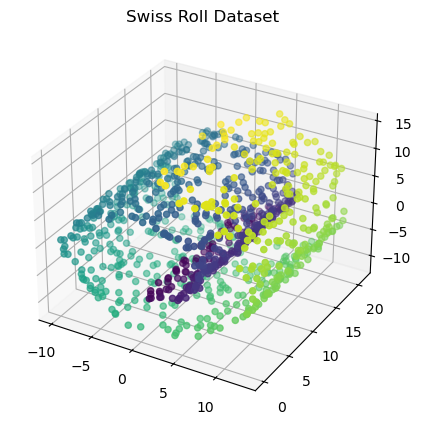

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# generate swiss roll dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 3D visualization
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.viridis)
ax.set_title("Swiss Roll Dataset")
plt.show()


# 10. Programs to demonstrate KNN

This program implements KNN on the Iris dataset and evaluates accuracy.

KNN predicts labels based on the closest neighbors in the feature space.

KNN Accuracy: 0.9777777777777777


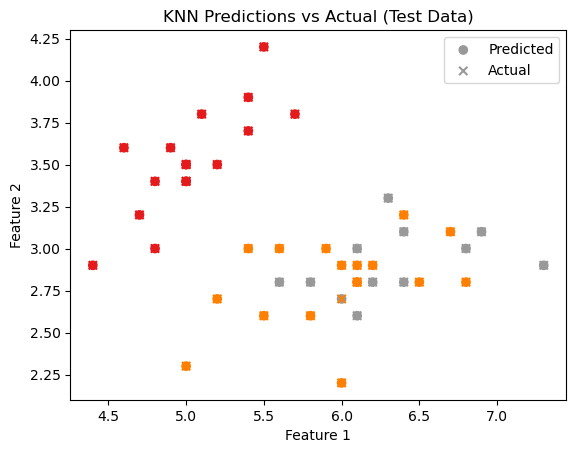

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))





import matplotlib.pyplot as plt

# Plot test data with predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, marker='o', label="Predicted")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, marker='x', label="Actual")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Predictions vs Actual (Test Data)")
plt.legend(["Predicted", "Actual"])
plt.show()



 # Random forest

 This program trains a Random Forest classifier using multiple decision trees.

It reduces overfitting and improves accuracy through ensemble learning.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))





import matplotlib.pyplot as plt
import numpy as np

# Use only first 2 features for plotting
X_plot, y_plot = X[:, :2], y
rf.fit(X_plot, y_plot)  # retrain on 2D data for visualization

# Mesh grid
x_min, x_max = X_plot[:,0].min() - 1, X_plot[:,0].max() + 1
y_min, y_max = X_plot[:,1].min() - 1, X_plot[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, edgecolor="k", s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Forest Decision Boundary")
plt.show()



Random Forest Accuracy: 0.9777777777777777


'import matplotlib.pyplot as plt\nimport numpy as np\n\n# Use only first 2 features for plotting\nX_plot, y_plot = X[:, :2], y\nrf.fit(X_plot, y_plot)  # retrain on 2D data for visualization\n\n# Mesh grid\nx_min, x_max = X_plot[:,0].min() - 1, X_plot[:,0].max() + 1\ny_min, y_max = X_plot[:,1].min() - 1, X_plot[:,1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),\n                     np.arange(y_min, y_max, 0.05))\n\nZ = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)\n\n# Plot decision boundary and points\nplt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)\nplt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, edgecolor="k", s=40)\nplt.xlabel("Feature 1")\nplt.ylabel("Feature 2")\nplt.title("Random Forest Decision Boundary")\nplt.show()\n\n'

## Naive Bayes 

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# load dataset (binary classification for simplicity)
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 1.0


# Decision tree

This program builds a Decision Tree classifier on the Iris dataset.

Decision Trees split features recursively to classify data based on feature rules.

Decision Tree Accuracy: 0.9777777777777777


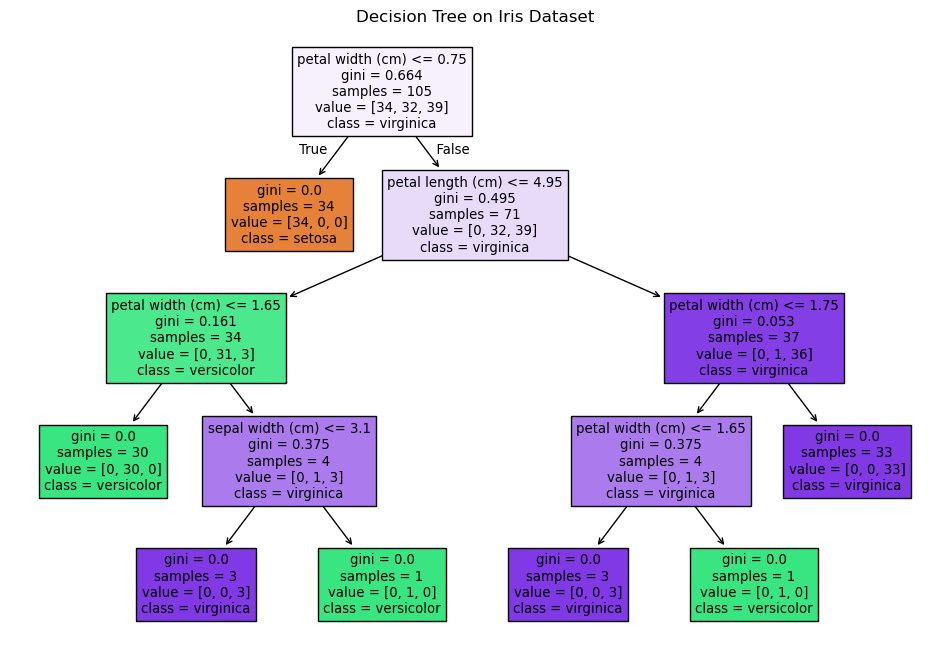

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.title("Decision Tree on Iris Dataset")
plt.show()



# Confusion matrix.

This program generates a Confusion Matrix to evaluate classification performance.

It shows true positives, false positives, true negatives, and false negatives for each class.

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### SVM

In [27]:
# SVM for Classification

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # Take first 2 features for easy visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("confussion matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))



Classification Accuracy: 0.7333333333333333
confussion matrix: [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



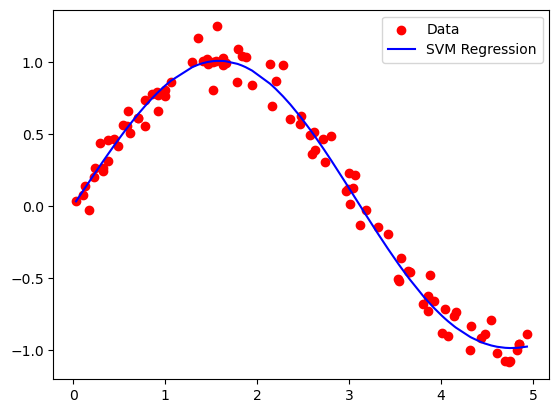

In [28]:
# SVM for Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # add noise

# Train SVM Regressor
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X, y)

# Predictions
y_pred = svr.predict(X)

# Plot
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, y_pred, color='blue', label='SVM Regression')
plt.legend()
plt.show()


In [29]:
import numpy as np

#1
x1 = np.array([2, 3])
x2 = np.array([4, 1])  


diff = x2 - x1  


w = diff  
print("Normal vector (w):", w)


midpoint = (x1 + x2) / 2
print("Midpoint:", midpoint)

# Equation of hyperplane: w . (x - midpoint) = 0 → w.x + b = 0
b = -np.dot(w, midpoint)
print(f"Equation of hyperplane: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")



# 2
w = np.array([3, 4])
margin = 1 / np.linalg.norm(w)
print("Margin of classifier:", margin)



# Problem 3: Support Vectors and Decision Boundary

w = np.array([1, -2])
b = 1

# a) Decision boundary equation
print(f"Decision boundary: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")

# b) Distance of point (2,3) from boundary
x = np.array([2, 3])
distance = abs(np.dot(w, x) + b) / np.linalg.norm(w)
print("Distance from (2,3) to decision boundary:", distance)



# Problem 4: Classification

w = np.array([1, 1])
b = -3
x = np.array([2, 1])

decision_value = np.dot(w, x) + b
predicted_class = 1 if decision_value >= 0 else -1
print("Decision function value:", decision_value)
print("Predicted class:", predicted_class)


Normal vector (w): [ 2 -2]
Midpoint: [3. 2.]
Equation of hyperplane: 2*x1 + -2*x2 + -2.0 = 0
Margin of classifier: 0.2
Decision boundary: 1*x1 + -2*x2 + 1 = 0
Distance from (2,3) to decision boundary: 1.3416407864998738
Decision function value: 0
Predicted class: 1


## K means


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

# 1. Generate synthetic dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)


## ELBOW METHOD

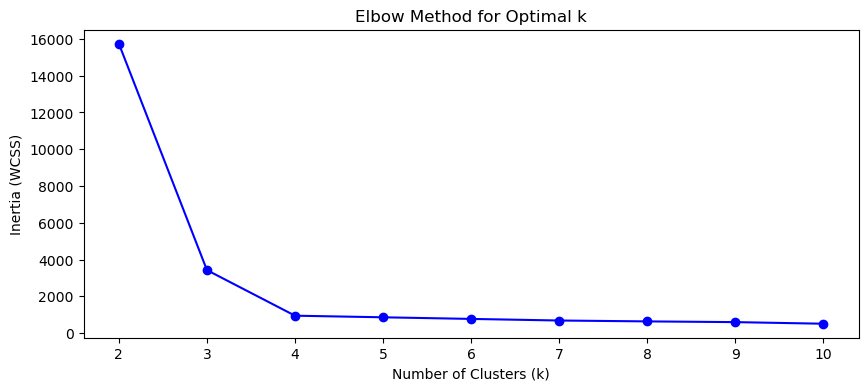

In [31]:
inertia = []   # Sum of squared distances (WCSS)
K_range = range(2, 11)  # Try k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

### Elbow Method Conclusion

- The WCSS curve drops steeply at first, then flattens out.

- That sharp bend (the "elbow") usually shows the best number of clusters.

- In the synthetic dataset we generated, you’ll see the elbow around k = 4.

- Translation: adding more clusters beyond 4 doesn’t really reduce the "messiness" much, so you’re just overcomplicating it.

## SILHOUETTE METHOD

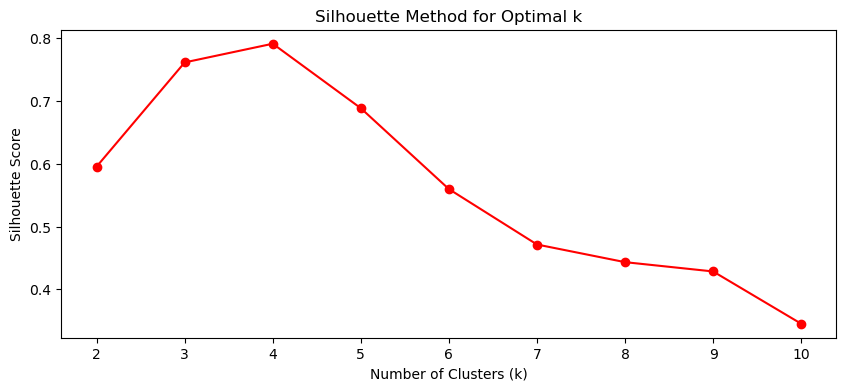

In [32]:
silhouette_avg = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_avg.append(score)

# Plot Silhouette Method
plt.figure(figsize=(10,4))
plt.plot(K_range, silhouette_avg, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()




### Silhouette Method Conclusion

- The silhouette score peaks around k = 4 as well.

- High silhouette score = clusters are well separated and tight.

- If you test smaller k (like 2 or 3), scores are decent but not as high.

- For bigger k (like 6, 7…), the score drops, meaning clusters start overlapping and making less sense.

## FINAL CLUSTERING

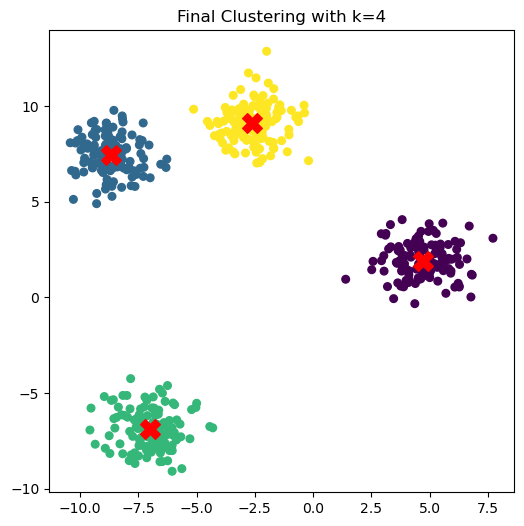

In [33]:
# Pick best k (say k=4 from plots)
kmeans_final = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans_final.fit_predict(X)

# Plot clustered data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title("Final Clustering with k=4")
plt.show()





### Final Judgment

- Both methods scream k = 4. Which is hilarious, because we actually made the dataset with 4 blobs in the first place. So the methods did their job: they rediscovered the hidden truth without peeking at the answer key.

## Implement SVM (Support Vector Machine) with 3 kernels — linear, polynomial, and RBF — on both 2D and 3D vectors

# SVM with 3 Kernels on 2D Data

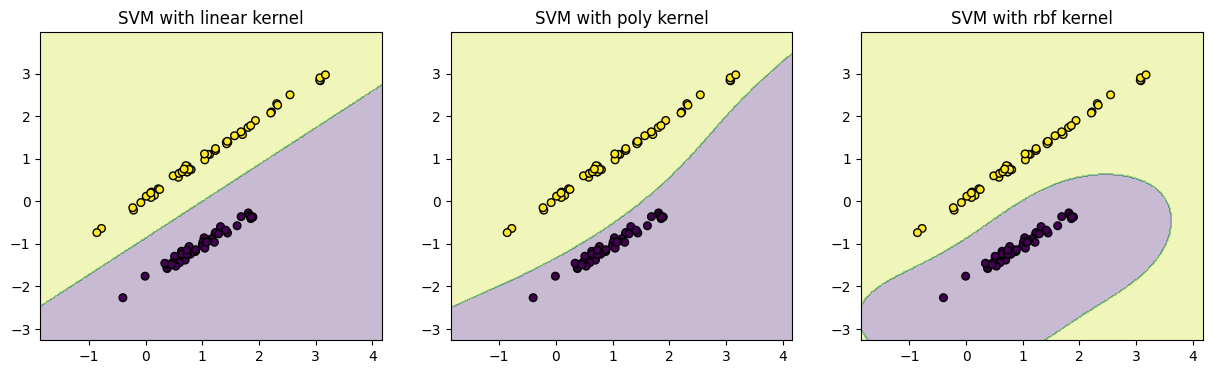

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

kernels = ['linear', 'poly', 'rbf']
x_min, x_max, y_min, y_max = X[:,0].min()-1, X[:,0].max()+1, X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

plt.figure(figsize=(15,4))
for i, k in enumerate(kernels,1):
    clf = svm.SVC(kernel=k, degree=3, gamma='auto').fit(X,y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.title(f"SVM with {k} kernel")
plt.show()


# SVM with 3 Kernels on 3D Data

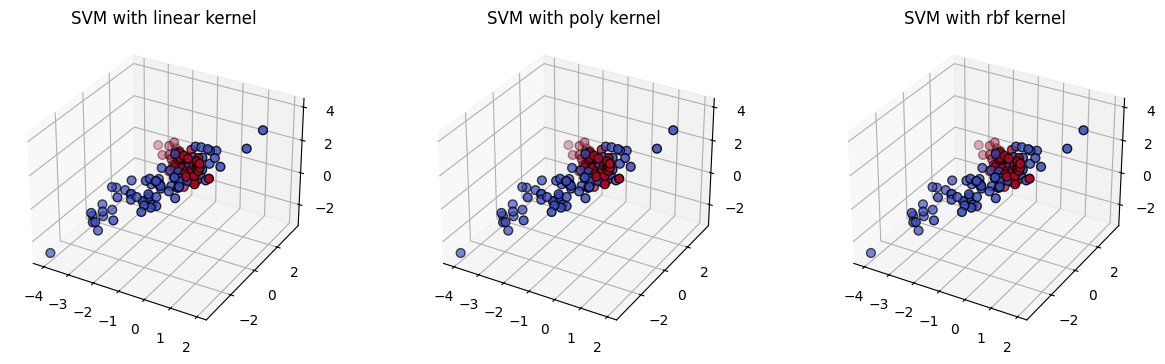

In [2]:
from sklearn import svm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=150, n_features=3, n_redundant=0,
                           n_informative=3, n_clusters_per_class=1, random_state=42)
kernels = ['linear', 'poly', 'rbf']
fig = plt.figure(figsize=(15,4))
for i, k in enumerate(kernels,1):
    clf = svm.SVC(kernel=k, degree=3, gamma='auto').fit(X,y)
    ax = fig.add_subplot(1,3,i,projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y, s=40, cmap='coolwarm', edgecolor='k')
    ax.set_title(f"SVM with {k} kernel")
plt.show()


## Implementing Bagging Technique 

Decision Tree Accuracy: 0.9333333333333333
Bagging Accuracy: 0.9466666666666667


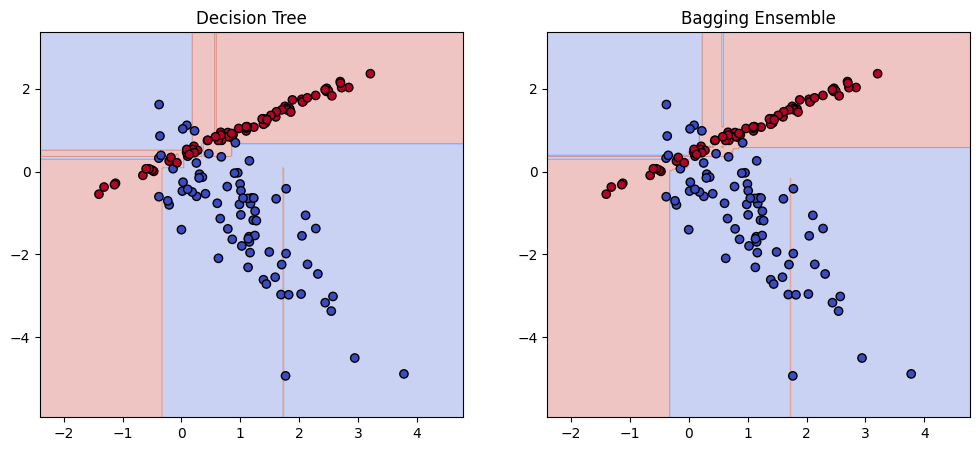

In [3]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Data generation & split
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
tree = DecisionTreeClassifier(random_state=42).fit(Xtr, ytr)
bag = BaggingClassifier(n_estimators=50, max_samples=0.8, bootstrap=True,
                        random_state=42).fit(Xtr, ytr)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(yte, tree.predict(Xte)))
print("Bagging Accuracy:", accuracy_score(yte, bag.predict(Xte)))

# Plot decision boundaries
def plot_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plot_boundary(tree, Xte, yte, "Decision Tree")
plt.subplot(1,2,2); plot_boundary(bag, Xte, yte, "Bagging Ensemble")
plt.show()


# Implementing Boosting Techniques

In [4]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 3.1 MB/s eta 0:00:23
   - -------------------------------------- 1.8/72.0 MB 3.7 MB/s eta 0:00:19
   - -------------------------------------- 2.9/72.0 MB 3.9 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/72.0 MB 3.9 MB/s eta 0:00:18
   -- ------------------------------------- 4.5/72.0 MB 3.9 MB/s eta 0:00:18
   --- ------------------------------------ 5.5/72.0 MB 4.1 MB/s eta 0:00:17
   --- ------------------------------------ 6.8/72.0 MB 4.3 MB/s eta 0:00:16
   ---- ----------------------------------- 7.6/72.0 MB 4.2 MB/s eta 0:00:16
   ---- ----------------------------------- 8.7/72.0 MB 4.3 MB/s eta 0:00:15
   ----- ---------------------------------- 9.7/72.0 MB 4.4 MB/s eta 0:00:15
   ------ --------------------------------- 11.0/72.0 MB 4.5 MB/s eta 0:00:14
   ------ --

## ADABOOST

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
# Create binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
# AdaBoost Classifier
ada = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("🎯 AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


🎯 AdaBoost Accuracy: 0.86


In [7]:
# Gradient Boosting Classifier
gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print("🎯 Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))


🎯 Gradient Boosting Accuracy: 0.9466666666666667


In [8]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


🎯 XGBoost Accuracy: 0.9533333333333334


c:\Users\saiva\anaconda3\envs\bootcamp\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:39:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


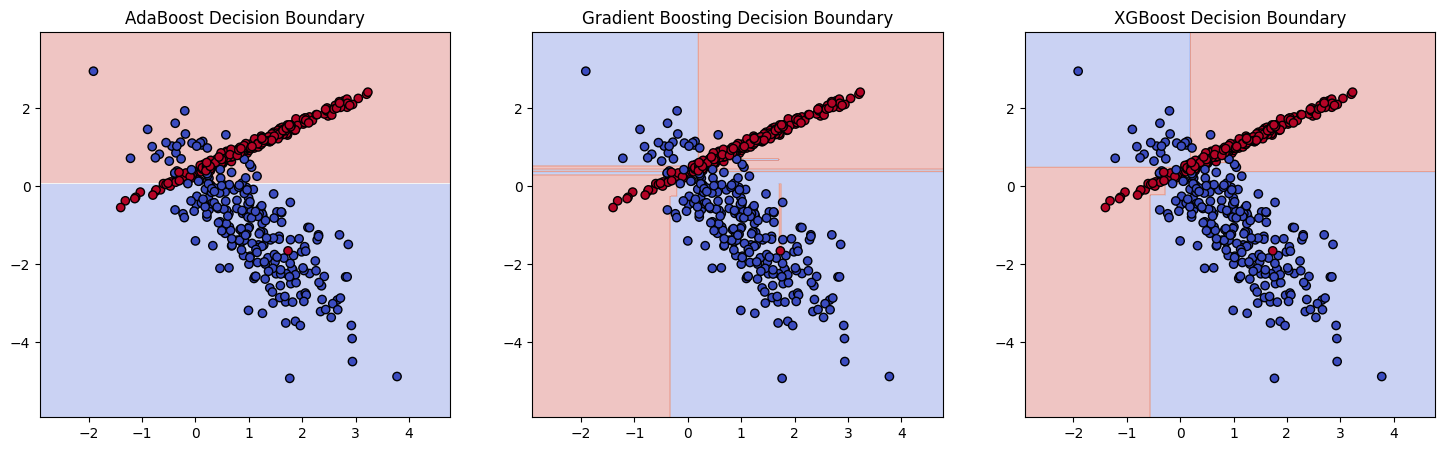

In [12]:
def plot_decision_boundaries(models, names, X, y):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    plt.figure(figsize=(18,5))
    for i, (model, name) in enumerate(zip(models, names), 1):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.subplot(1,3,i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
        plt.title(f"{name} Decision Boundary")
    plt.show()

plot_decision_boundaries([ada, gbm, xgb_model],
                         ["AdaBoost", "Gradient Boosting", "XGBoost"],
                         X, y)


## Voting Implementation

 Hard Voting Accuracy: 0.875
 Soft Voting Accuracy: 0.85


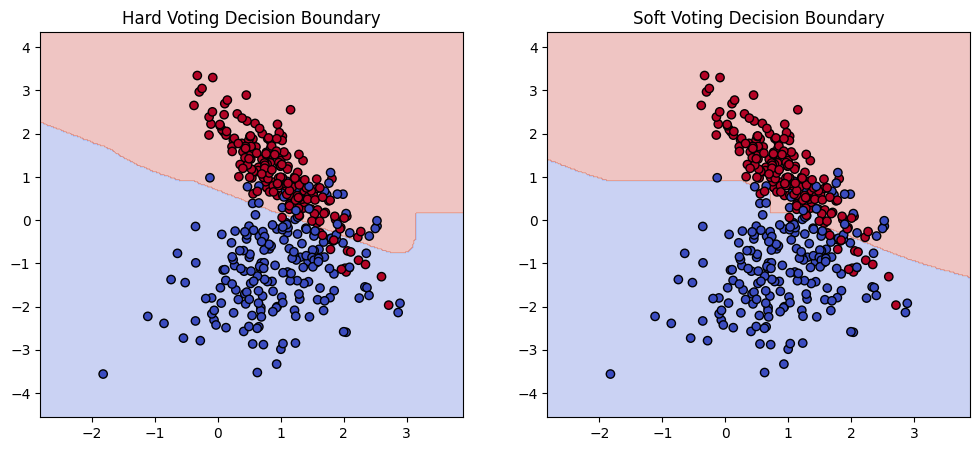

In [3]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Dataset
X, y = make_classification(n_samples=400, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
svm = SVC(probability=True, kernel='rbf', gamma='scale', random_state=42)

# Hard & Soft Voting
hard = VotingClassifier([('lr', lr), ('dt', dt), ('svm', svm)], voting='hard').fit(Xtr, ytr)
soft = VotingClassifier([('lr', lr), ('dt', dt), ('svm', svm)], voting='soft').fit(Xtr, ytr)

print(" Hard Voting Accuracy:", accuracy_score(yte, hard.predict(Xte)))
print(" Soft Voting Accuracy:", accuracy_score(yte, soft.predict(Xte)))

# Combined decision boundary plot
def plot_boundaries(models, names, X, y):
    x_min, x_max, y_min, y_max = X[:,0].min()-1, X[:,0].max()+1, X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    plt.figure(figsize=(12,5))
    for i, (m, n) in enumerate(zip(models, names), 1):
        Z = m.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.subplot(1,2,i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
        plt.title(f"{n} Decision Boundary")
    plt.show()

plot_boundaries([hard, soft], ["Hard Voting", "Soft Voting"], X, y)
